# LIBRERÍAS:

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import PartialDependenceDisplay
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance

In [62]:
nombres_columnas = ["id","date","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15","price"]

In [63]:
# Leemos y exploramos los datos
df=pd.read_csv(r"C:\Users\anasa\Desktop\Ana\IRONHACK\Mini-proyecto\Real Estate\DB\regression_data.csv", names=nombres_columnas)

In [64]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [65]:
df.shape

(21597, 21)

# LIMPIEZA DE DATOS:

In [66]:
# Observamos que el DF no tiene nombre en las columnas, por ellos vamos a asignarselos a continuación:
df.columns = nombres_columnas

# Mostrar el DataFrame con nombres de columnas
print(df)

               id      date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  10/13/14         3       1.00         1180      5650   
1      6414100192   12/9/14         3       2.25         2570      7242   
2      5631500400   2/25/15         2       1.00          770     10000   
3      2487200875   12/9/14         4       3.00         1960      5000   
4      1954400510   2/18/15         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   263000018   5/21/14         3       2.50         1530      1131   
21593  6600060120   2/23/15         4       2.50         2310      5813   
21594  1523300141   6/23/14         2       0.75         1020      1350   
21595   291310100   1/16/15         3       2.50         1600      2388   
21596  1523300157  10/15/14         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0        

In [67]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [68]:
# 1.3. Usamos el método isna() para identificar los valores NaN y luego suma los True (1) para contarlos en cada columna
conteo_nan_por_columna = df.isna().sum()

# Muestra el conteo de NaN por columna
print(conteo_nan_por_columna)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [69]:
# Checkeamos tambien si existen celdas vacías
# Suma los valores nulos en cada columna
conteo_nulos_por_columna = df.isnull().sum()

# Muestra el conteo de valores nulos por columna
print(conteo_nulos_por_columna)
# Como no hay no hacemos ningun otro analisis

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [70]:
# Vamos a checkear tambien si existen filas duplicadas en el DF para eliminarlas
# Suma los valores duplicados en el DataFrame
total_filas_duplicadas = df.duplicated().sum()

# Muestra el total de filas duplicadas
print("Total de filas duplicadas:", total_filas_duplicadas)
# Como no hay no hacemos ningun otro analisis

Total de filas duplicadas: 0


In [71]:
# Ademas podemos agrupar variables entre numericas y categoricas para porsteriormente codificar las columnas de variables ctegoricas:
# Para ello en primer lugar analizaremos los tipos de datos que tenemos:
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [72]:
# Ahora si, clasificamos:
numericals = df.select_dtypes(include=['int', 'float'])
categoricals = df.select_dtypes(exclude=['int', 'float'])

In [73]:
# Realmente como categoricals, solo tenemos date que deberia estar en formato date:
df['date'] = pd.to_datetime(df['date'])
# Al ver que no hay mas columnas categoricas que la de fecha, no tendremos que codificar ninguna columna.

C:\Users\anasa\AppData\Local\Temp\ipykernel_6312\2761955261.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


# ESTUDIO Y TRATAMIENTO DE OUTLIERS:

In [74]:
# Aplicamos el analisis de desviacion estandard a las variables numericas del df para el estudio de outliers

# Desviación estándar: Identifica valores lejanos de la media de una variable, 
# por ejemplo, aquellos que están más de tres desviaciones estándar de la media.

# Calculamos la media y la desviación estándar para cada columna
medias = numericals.mean()
desviaciones_estandar = numericals.std()

# Establecemos un umbral (por ejemplo, 3 desviaciones estándar de la media)
umbral_superior = medias + 3 * desviaciones_estandar
umbral_inferior = medias - 3 * desviaciones_estandar

# Iteramos sobre cada columna para encontrar los valores atípicos:
valores_atipicos_por_columna = {}
for columna in numericals.columns:
    valores_atipicos_por_columna[columna] = numericals[(numericals[columna] > umbral_superior[columna]) | (numericals[columna] < umbral_inferior[columna])]

# Sacamos los valores atípicos por cada columna
for columna, valores_atipicos in valores_atipicos_por_columna.items():
    print(f"Valores atípicos en la columna '{columna}':")
    print(valores_atipicos)


Valores atípicos en la columna 'id':
Empty DataFrame
Columns: [id, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, price]
Index: []
Valores atípicos en la columna 'bedrooms':
               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
556    5486800070         7       3.50         4640     15235     2.0   
1134   4024100951         7       3.00         2940      8624     1.0   
1239   7227802030         7       3.00         2800      9569     1.0   
1658   9126101740         8       5.00         2800      2580     2.0   
3717   5451100490         7       4.75         5370     10800     1.5   
...           ...       ...        ...          ...       ...     ...   
18808  4040500100         7       2.25         2620      6890     2.0   
18960  1778360150         7       5.50         6630     13782     2.0   
19239  8812401450        10   

In [75]:
# Si consideramos el metodo de  rango intercuartílico (IQR): 
# Calcula el rango intercuartílico (IQR) para una variable y considera como atípicos los > al tercer cuartil más 1.5 veces el IQR 
# o por debajo del primer cuartil menos 1.5 veces el IQR.

# Supongamos que 'numericals' es tu DataFrame

# Calcula los cuartiles 1 (Q1) y 3 (Q3) para todas las columnas
q1 = numericals.quantile(0.25)
q3 = numericals.quantile(0.75)

# Calcula el rango intercuartílico (IQR) para todas las columnas
iqr = q3 - q1

# Define los límites inferior y superior para identificar valores atípicos en todas las columnas
umbral_inferior = q1 - 1.5 * iqr
umbral_superior = q3 + 1.5 * iqr

# Encuentra los valores atípicos en todas las columnas
valores_atipicos = (numericals < umbral_inferior) | (numericals > umbral_superior)

# Muestra los valores atípicos:
print("Valores atípicos:")
print(valores_atipicos)

Valores atípicos:
          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0      False     False      False        False     False   False       False   
1      False     False      False        False     False   False       False   
2      False     False      False        False     False   False       False   
3      False     False      False        False     False   False       False   
4      False     False      False        False     False   False       False   
...      ...       ...        ...          ...       ...     ...         ...   
21592  False     False      False        False     False   False       False   
21593  False     False      False        False     False   False       False   
21594  False     False      False        False     False   False       False   
21595  False     False      False        False     False   False       False   
21596  False     False      False        False     False   False       False   

        view  conditi

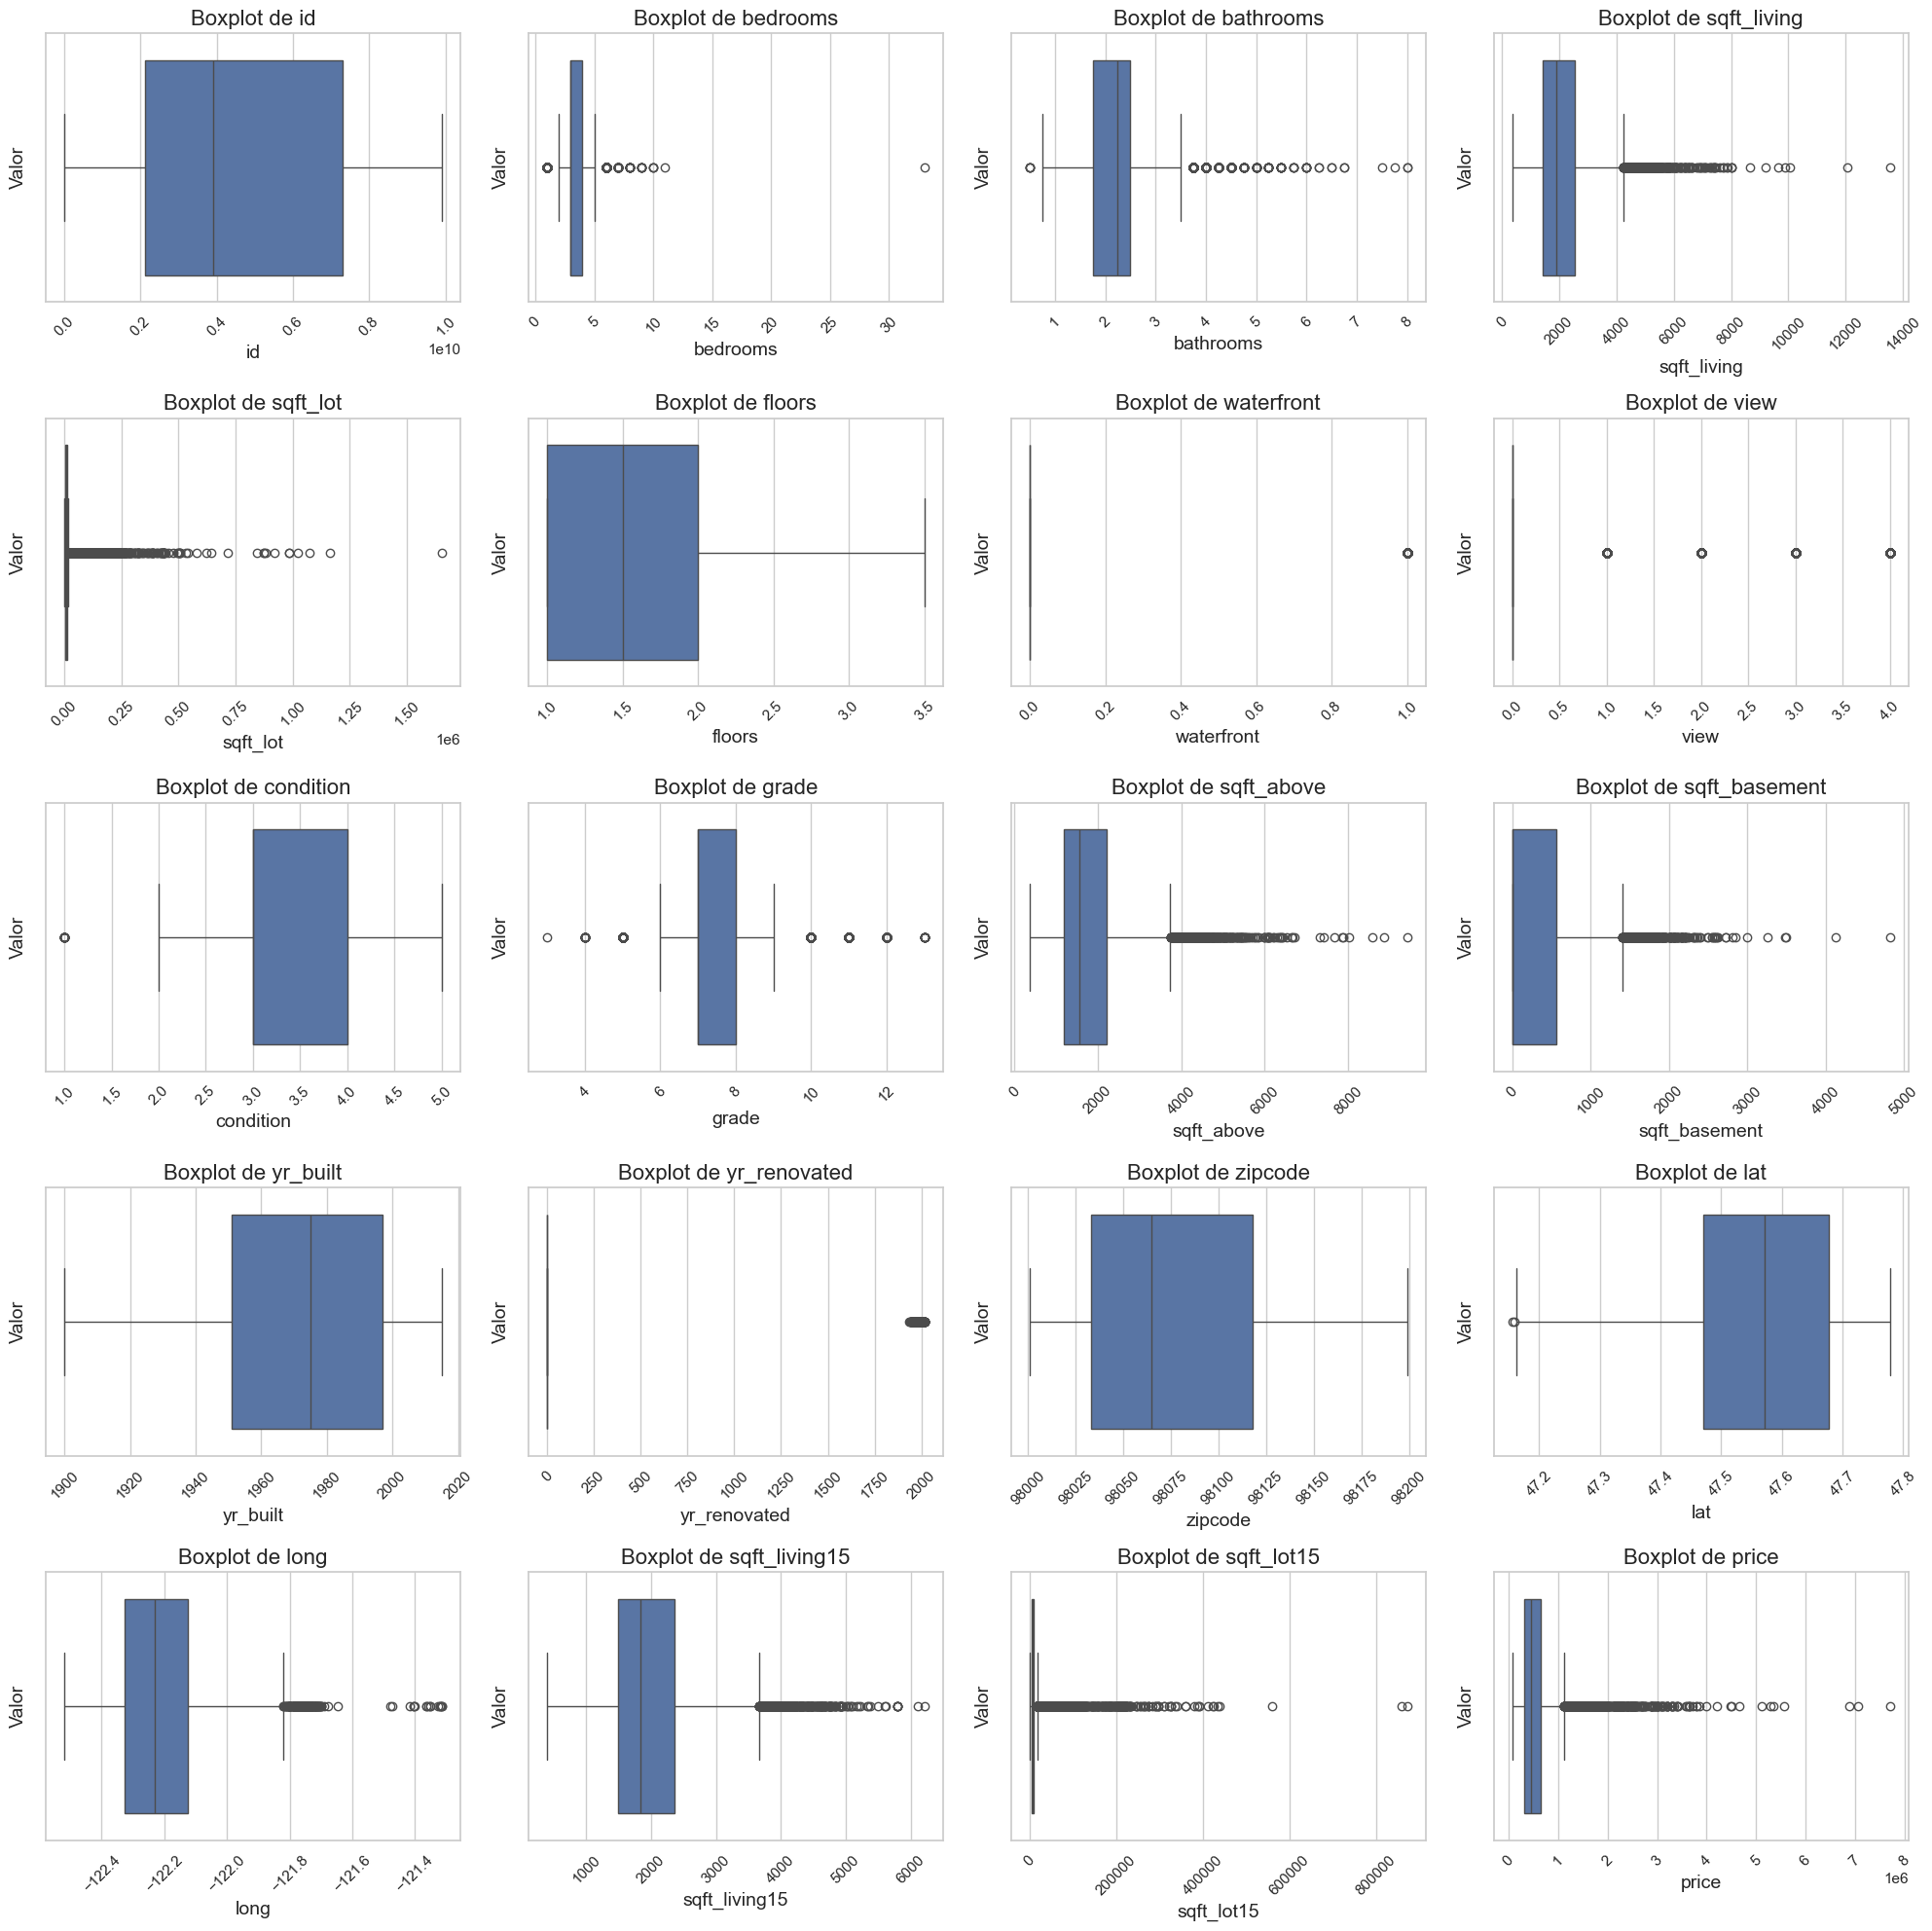

In [76]:
# Para el analisis de datos atípicos/outliers vamos a emplear el analisis grafico a traves del diagrama de caja o diagrama de caja y bigote.
# Los valores que están por encima o por debajo de los "bigotes" del diagrama de caja se consideran atípicos.

# Vamos a aplicar este método únicamente a los datos de variables numericas puesto que los codificados no tendran outliers:
# Para crear el diagrama de caja y bigotes
columnas = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

# Ajustamos el tamaño de la figura
plt.figure(figsize=(20, 20))

# Iteramos sobre cada columna en la lista columnas y creamos un boxplot separado
for i, columna in enumerate(columnas, 1):
    plt.subplot(5, 4, i)  # Filas: 5, Columnas: 4, Índice de la subfigura: i
    sns.boxplot(x=numericals[columna])
    plt.title(f'Boxplot de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
    plt.ylabel('Valor', fontsize=14)

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()

In [77]:
# Eliminamos datos atípicos de DF (numericals tendrá valores atipicos y numericals1 ya no tiene en cuanta tipicos):

# PAra eliminar atipicos vamos a considerar la siguiente condicion
# &= asegura que solo las filas que cumplen todas las condiciones (no son outliers en ninguna columna) se mantengan.
condition = True
for columna in numericals.columns:
    condition &= (numericals[columna] <= umbral_superior[columna]) & (numericals[columna] >= umbral_inferior[columna])

numericals1 = numericals[condition]

print("DataFrame original:")
print(numericals)

# El nuevo numericals1 es como numericals pero ya sin atípicos:
print("\nDataFrame después de eliminar los valores atípicos:")
print(numericals1)

DataFrame original:
               id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0        

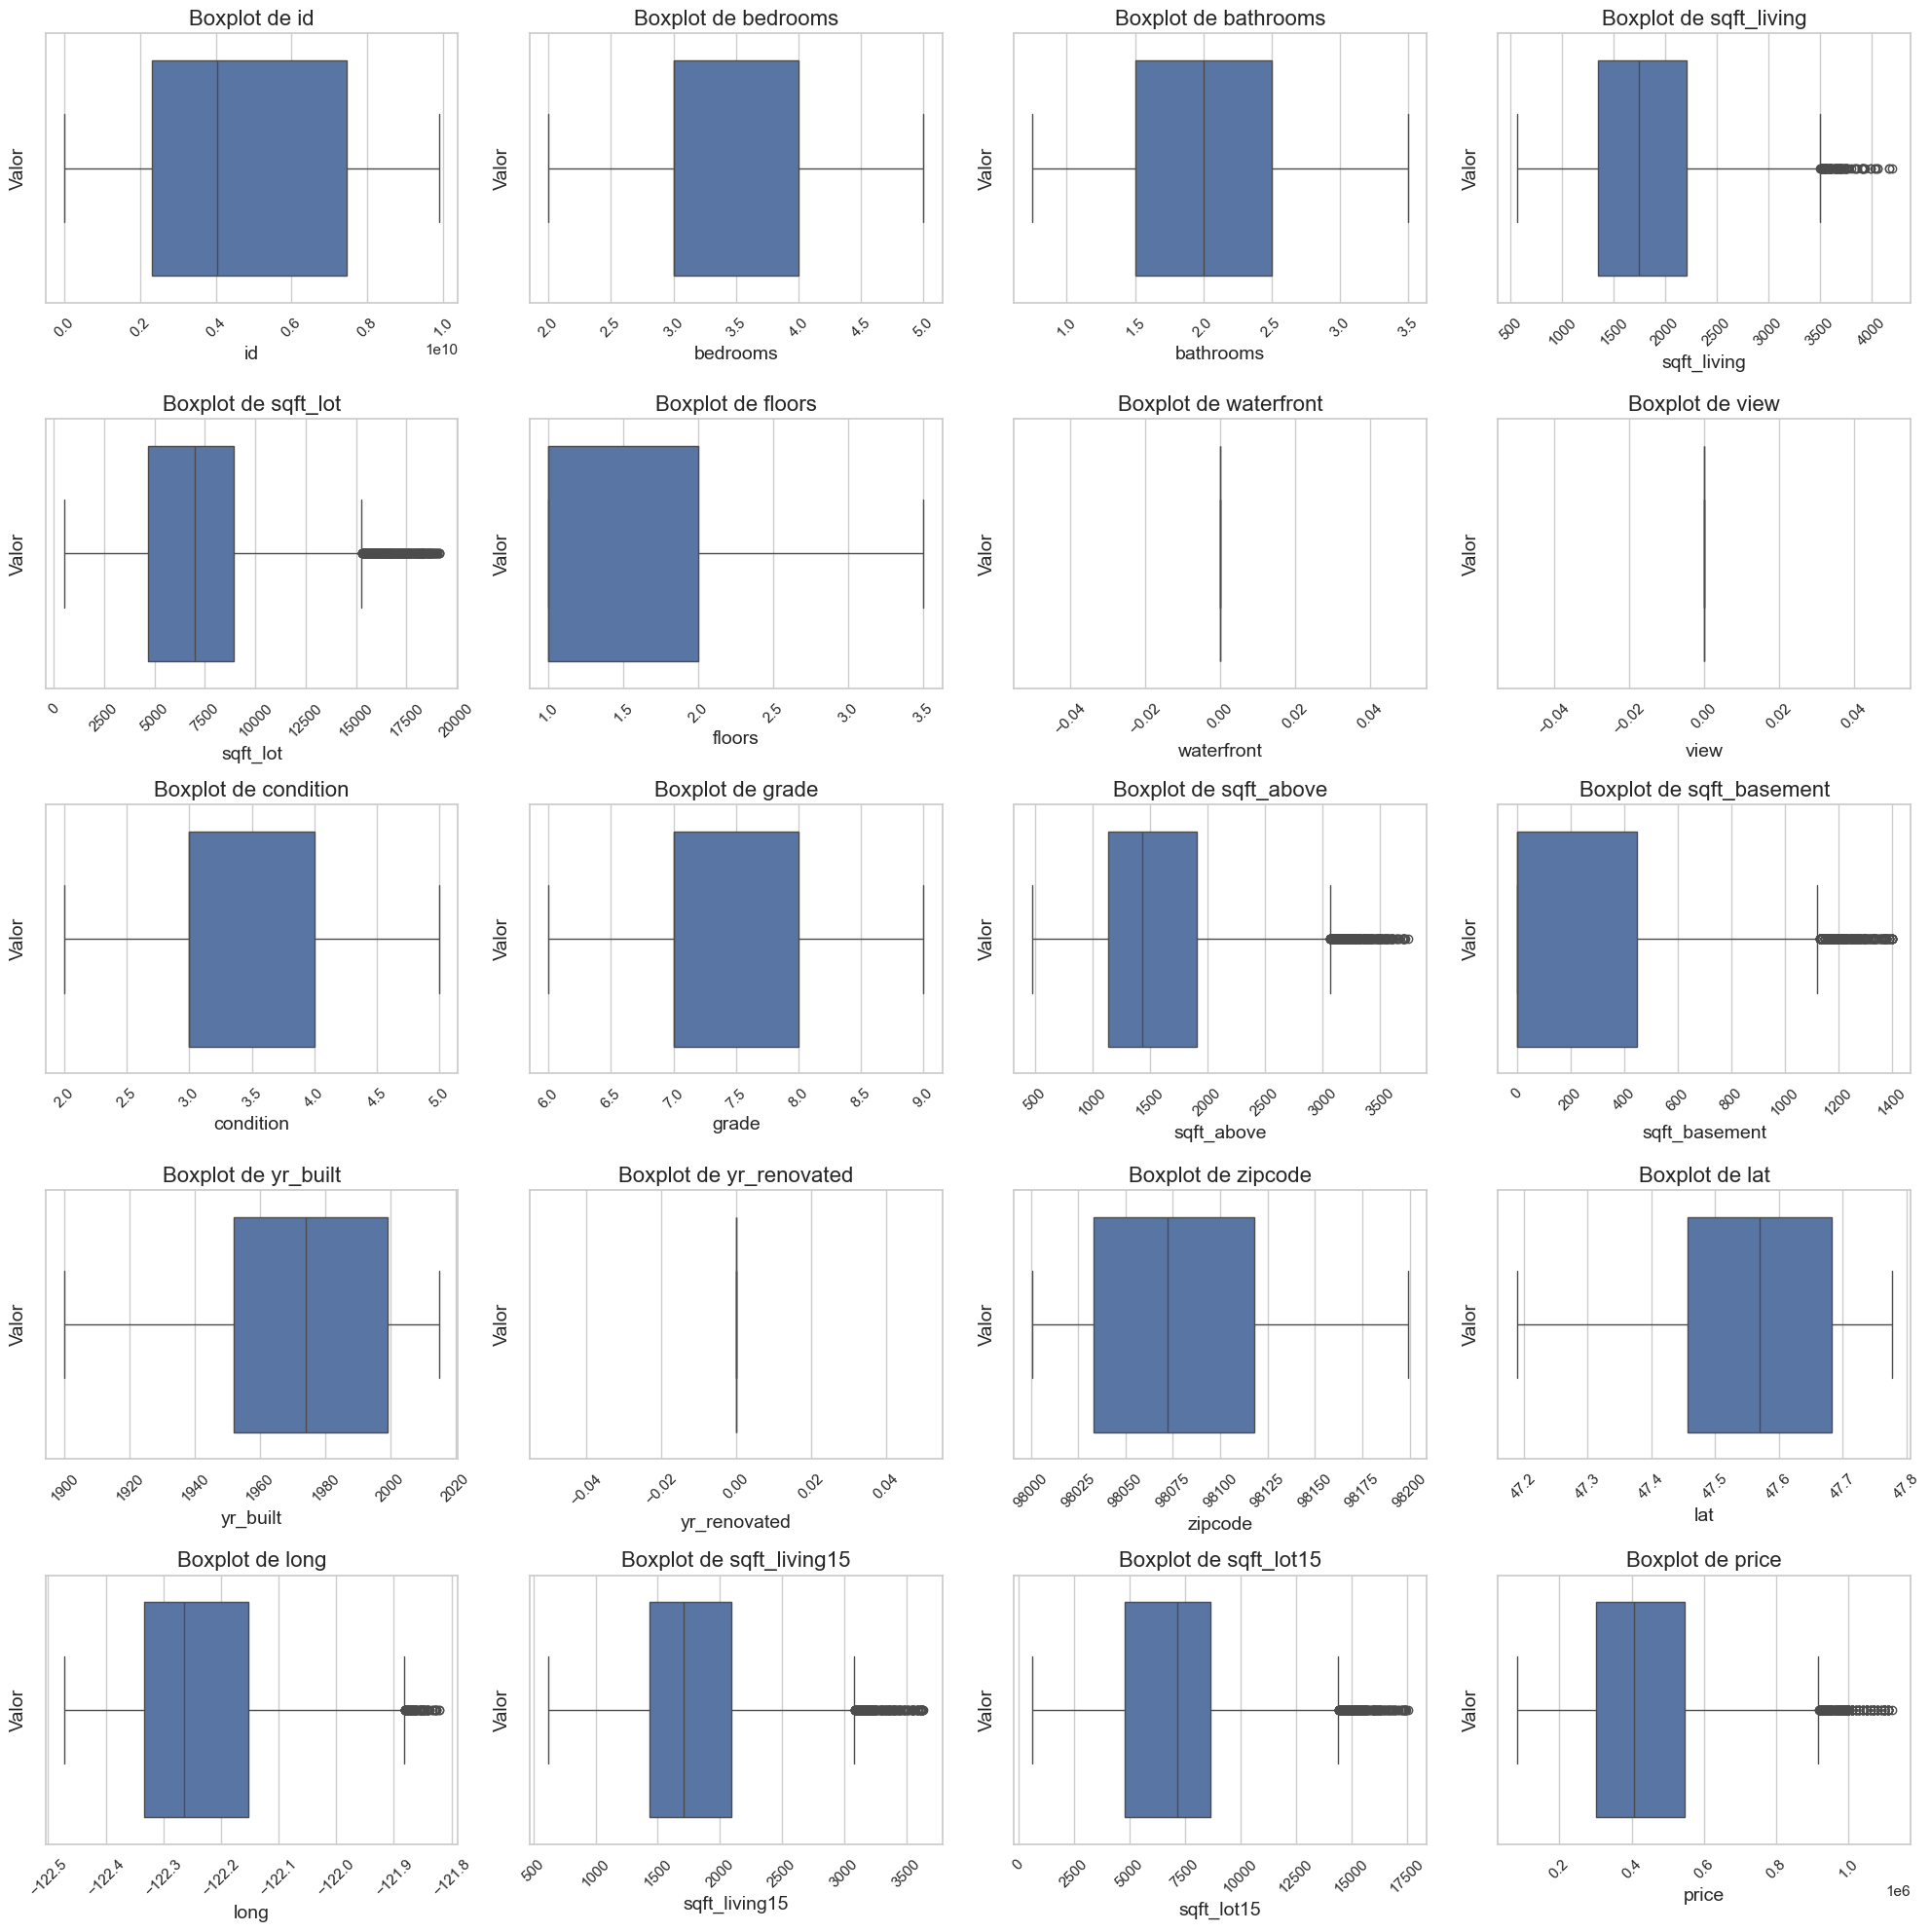

In [78]:
# Si volvemos a imprimir los diagramas de caja y bigote para lo snuevos datos de numericals sin atipicos deberían quedarnos meos datos en los extremos
columnas = ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

# Ajustamos el tamaño de la figura
plt.figure(figsize=(20, 20))

# Iteramos sobre cada columna en la lista columnas y creamos un boxplot separado
for i, columna in enumerate(columnas, 1):
    plt.subplot(5, 4, i)  # Filas: 5, Columnas: 4, Índice de la subfigura: i
    sns.boxplot(x=numericals1[columna])
    plt.title(f'Boxplot de {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje x
    plt.ylabel('Valor', fontsize=14)

plt.tight_layout()  # Ajustar el diseño de los subplots
plt.show()

# NORMALIZACIÓN DE DATOS:

In [79]:
# Normalización de variables continuas:
# Existen 2 metodos de normalización: Min-Max y la normalización Z-score la eleccion de metodo depende de tus datos:
# Normalización Min-Max:
#Ventajas:
    # - Conserva la escala relativa de los datos originales (útil si la interpretación de los valores en su escala original) 
#Desventajas:
    # - Sensible a valores atípicos: si tus datos son extremadamente grandes/pequeños, la Min-Max puede distorsionar la distribución de los datos.
    # - No estandariza datos--> podría ser inadecuada si usas sensibles a la escala, como los modelos de regresión lineal.
# Normalización Z-score:
#Ventajas:
    # - Estandariza los datos para media=0 y desviación estándar=1, lo que puede ser útil para algoritmos sensibles a la escala y para comparar variables con diferentes unidades o escalas.
    # - Menos sensible a valores atípicos Vs. la normalización Min-Max, ya que utiliza la media y la desviación estándar.
# Desventajas:
    # - No conserva la escala relativa de los datos originales-->dificulta la interpretación de los valores normalizados si es importante mantener la interpretación en la escala original.
    

    # Crea el objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos numéricos
scaled_numericals = scaler.fit_transform(numericals)
# Crea el DataFrame con los datos escalados usando los nombres de las columnas originales
scaled_numericals
numericals=pd.DataFrame(scaled_numericals, columns=df.select_dtypes(include=["int64", "float64"]).columns)
numericals

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.886034,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.735251,-0.659031,-0.544678,-0.210210,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,-0.866716
1,0.637413,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.460776,0.244602,-0.680850,4.744842,0.879210,1.161376,-0.746286,-0.432887,-0.187700,-0.006252
2,0.365362,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.230575,-0.659031,-1.293626,-0.210210,-0.933473,1.283355,-0.135144,1.070292,-0.172190,-0.980773
3,-0.727673,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,-0.560800,-0.892305,1.396734,-0.204247,-0.210210,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.173409
4,-0.912887,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,0.291589,-0.131197,-0.659031,0.544700,-0.210210,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-1.500859,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.087205,-0.305715,-0.629986,0.291589,-0.312413,-0.659031,1.293648,-0.210210,0.468086,1.004752,-0.938156,-0.666390,-0.412457,-0.490790
21593,0.702057,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.087205,-0.305715,-0.629986,0.291589,0.629911,-0.659031,1.463863,-0.210210,1.271647,-0.356503,-1.051856,-0.228571,-0.203796,-0.381905
21594,-1.062748,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,-0.928548,-0.659031,1.293648,-0.210210,1.234272,0.247617,-0.604160,-1.410683,-0.394198,-0.376186
21595,-1.491018,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.087205,-0.305715,-0.629986,0.291589,-0.227845,-0.659031,1.123432,-0.210210,-0.952160,-0.184722,1.030289,-0.841518,-0.420597,-0.381905


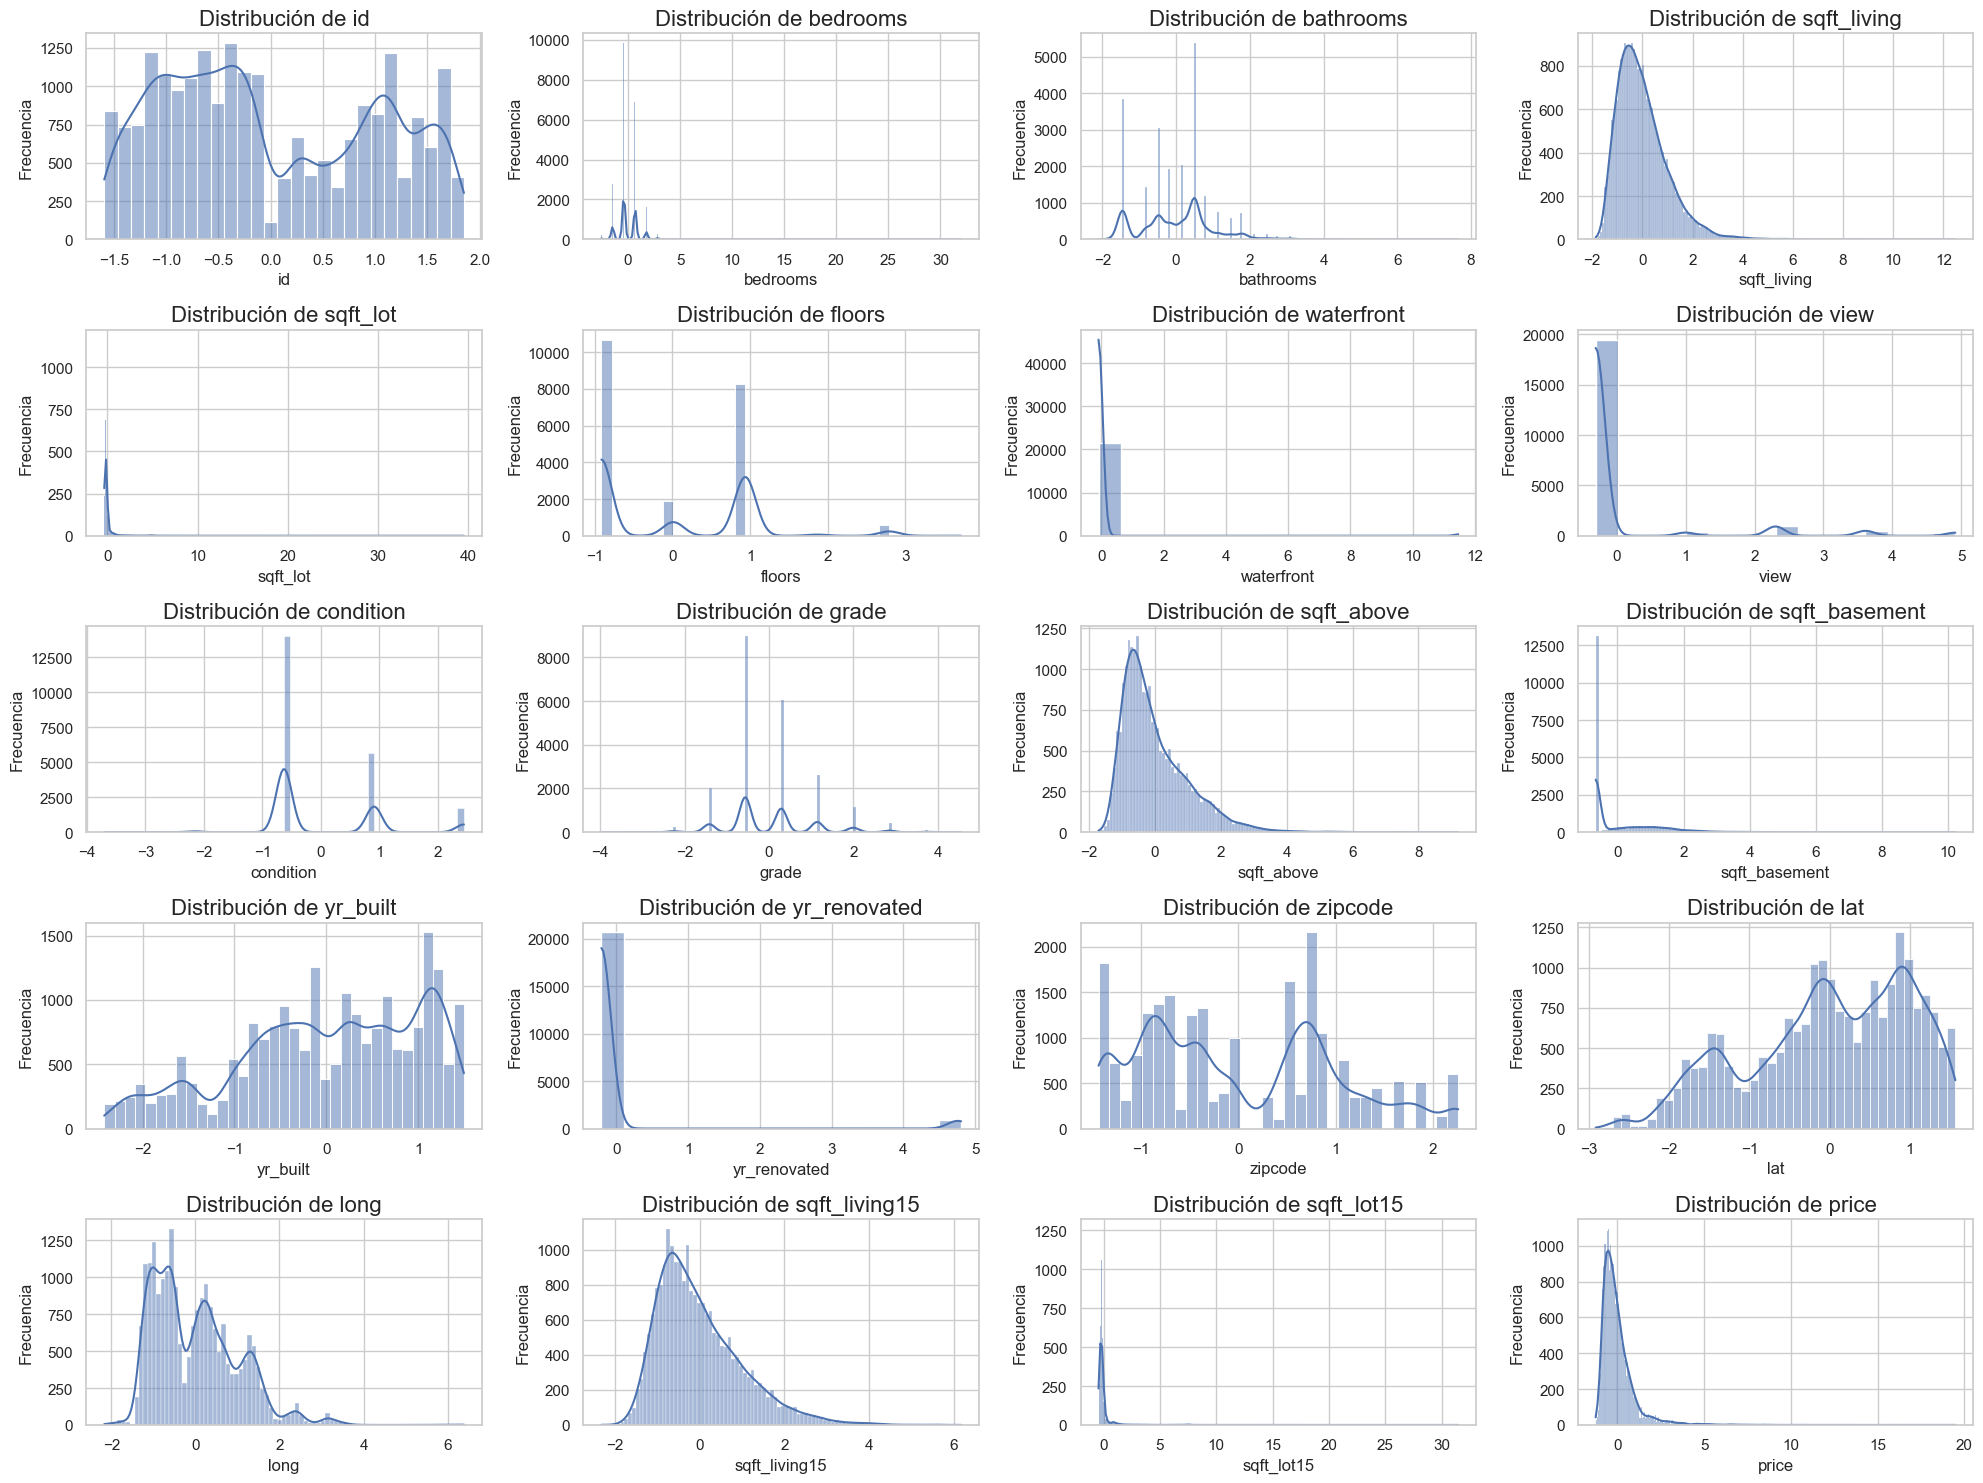

In [80]:
# Convertir el ndarray a DataFrame
scaled_numericals = pd.DataFrame(scaled_numericals, columns=numericals1.columns)

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura de múltiples subplots para histogramas
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas del DataFrame escalado
for i, column in enumerate(scaled_numericals.columns):
    sns.histplot(scaled_numericals[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}', fontsize=16)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes adicionales si hay menos gráficos que subplots
if len(scaled_numericals.columns) < len(axes):
    for j in range(len(scaled_numericals.columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [81]:
# Ahora fusionamos los df de numericals y categoricals en un nuevo df para que los codificados y numericos aparezcan juntos:
df_concat = pd.concat([categoricals, numericals], axis=1)
df_concat

,date,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10/13/14,0.886034,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,...,-0.735251,-0.659031,-0.544678,-0.210210,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,-0.866716
1,12/9/14,0.637413,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,...,0.460776,0.244602,-0.680850,4.744842,0.879210,1.161376,-0.746286,-0.432887,-0.187700,-0.006252
2,2/25/15,0.365362,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,...,-1.230575,-0.659031,-1.293626,-0.210210,-0.933473,1.283355,-0.135144,1.070292,-0.172190,-0.980773
3,12/9/14,-0.727673,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,...,-0.892305,1.396734,-0.204247,-0.210210,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.173409
4,2/18/15,-0.912887,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,...,-0.131197,-0.659031,0.544700,-0.210210,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/14,-1.500859,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.087205,-0.305715,-0.629986,...,-0.312413,-0.659031,1.293648,-0.210210,0.468086,1.004752,-0.938156,-0.666390,-0.412457,-0.490790
21593,2/23/15,0.702057,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.087205,-0.305715,-0.629986,...,0.629911,-0.659031,1.463863,-0.210210,1.271647,-0.356503,-1.051856,-0.228571,-0.203796,-0.381905
21594,6/23/14,-1.062748,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.087205,-0.305715,-0.629986,...,-0.928548,-0.659031,1.293648,-0.210210,1.234272,0.247617,-0.604160,-1.410683,-0.394198,-0.376186
21595,1/16/15,-1.491018,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.087205,-0.305715,-0.629986,...,-0.227845,-0.659031,1.123432,-0.210210,-0.952160,-0.184722,1.030289,-0.841518,-0.420597,-0.381905


In [82]:
df_concat.shape # Observamos que tras la codificacion y la fusion de data frames la forma del DF es correcta y no hemos perdidio ningun dato por el camino

(21597, 21)

In [83]:
# Estudio de relevancia de variables:
    # Analisis de multicolinearidad/datos redundantes:
        # Matriz de correlación
        # VIF

In [84]:
# Estudio de relevancia de variables:
    # Analisis de multicolinearidad/datos redundantes:
        # Matriz de correlación
        # VIF
        
        
# Matriz de correlación:
correl_matrix=numericals.corr()
correl_matrix

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


In [85]:
# Como vemos que la matriz es muy grande y para evitar errores de analisis manual, vamos a identificar correlaciones altas
# Para ello, analizamos correlaciones en valor absoluto (para considerar positivas y negativas)
absolute_correlations = np.abs(correl_matrix)

# Seleccionamos la mitad superior de la matriz de correl (sin diagonal principal) y los valores redundantes debajo de ella
# Seleccionamos para obtener solo los valores de la mitad superior de la matriz de correlación:
upper_tri_mask = np.triu(np.ones(absolute_correlations.shape), k=1).astype(bool)
upper_tri_matrix = absolute_correlations[upper_tri_mask]

# Definimos umbral de correlación. 
# Aquí de 0.7 --> solo se considerarán como altamente correlacionadas las >= 0.7 (en valor absoluto)
correlation_threshold = 0.7

# Identifica los pares de índices de variables con correlación por encima del umbral definido. Estos pares se almacenan en una lista llamada highly_correlated_pairs.
#(using mask and boolean indexing)
highly_correlated_pairs = []
correlated_indices = upper_tri_matrix >= correlation_threshold
row_indices, col_indices = np.where(correlated_indices)
for i, j in zip(row_indices, col_indices):
    highly_correlated_pairs.append((i, j))  # You can adjust if you have column names

# Print or store the identified pairs
print(highly_correlated_pairs)


[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (37, 3), (38, 2), (38, 3), (39, 2), (39, 3), (40, 2), (40, 3), (41, 2), (41, 3), (42, 2), (42, 3), (43, 2), (43, 3), (44, 2), (44, 3), (45, 2), (45, 3), (46, 2), (46, 3), (47, 2), (47, 3), (48, 2), (48, 3), (49, 2), (49, 3), (50, 2), (50, 3), (51, 2), (51, 3), (52, 2), (52, 3), (53, 2), (53, 3), (54, 2), (54, 3), (54, 9), (54, 10), (54, 17), (54, 19), (55, 2), (55, 3), (55, 9), (55, 10), (55, 17), (55, 19), (56, 2), (56, 3), (56, 9), (56, 10), (56, 17), (56, 19), (57, 2), (57, 3), (57, 9), (57, 10), (57, 17), (57, 19), (58, 2), (58, 3), (58, 9), (58, 10), (58, 17), (58, 19), (59, 2), (59, 3), (59, 9), (59, 10), (59, 17), (59, 19), (60, 2), (60, 3), (60, 9), (

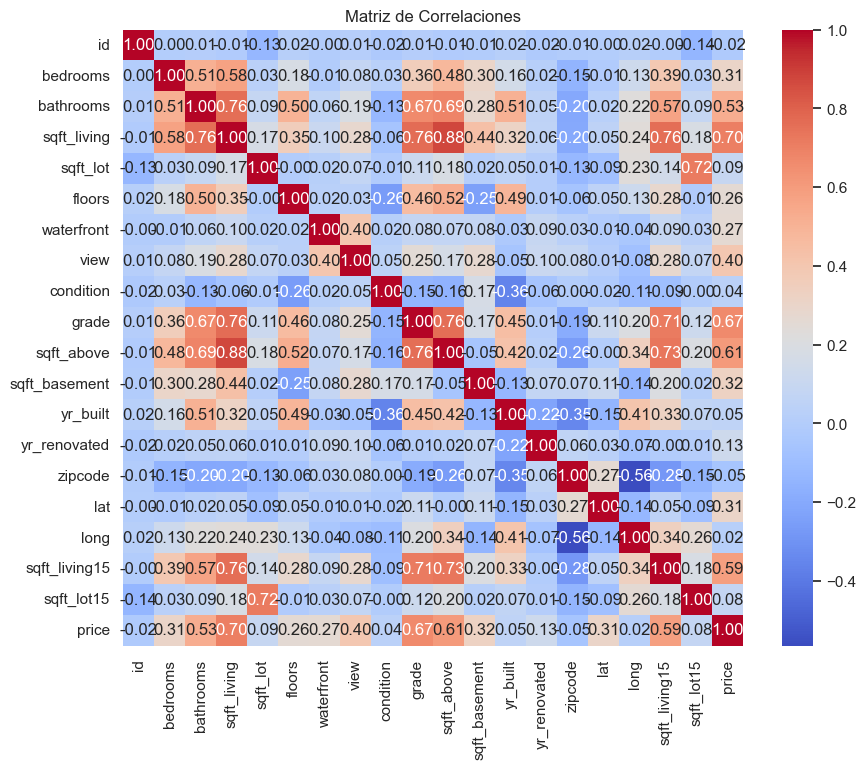

In [86]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(10, 8))  # Define el tamaño de la figura
sns.heatmap(correl_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlaciones')
plt.show()

De la matriz de correlaciones observamos que las correlaciones mas elevadas estan entre sqft_lot, sqft_lot, sqft_basement, yr_built.
Sin embargo, es notablemente mas alta en los casos de q2 y q3 con average_balance. Ante esto, podriamos considerar eliminar las variables en cuestion.
    
Para complementar este análisis vamos a considerar otros metodos de estudio de multicolinearidad para ver si nos llevan a conclusiones mas concretas.

In [87]:
# VIF:
# Ahora intentamos analizar coliarity con VIF:

# Añadir una columna constante al DataFrame para el término de intercepción
x = add_constant(numericals)
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numericals.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(20)]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)

c:\Users\anasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


         Variable       VIF
0              id  1.000000
1        bedrooms  1.028469
2       bathrooms  1.680289
3     sqft_living  3.391850
4        sqft_lot       inf
5          floors  2.106796
6      waterfront  2.015405
7            view  1.266992
8       condition  1.477605
9           grade  1.257445
10     sqft_above  3.749515
11  sqft_basement       inf
12       yr_built       inf
13   yr_renovated  2.581090
14        zipcode  1.152538
15            lat  1.686214
16           long  1.352541
17  sqft_living15  1.856001
18     sqft_lot15  2.987110
19          price  2.147409


Analizando matriz de correlecaciones y VIF (Factor de Inflación de la Varianza) para evaluar la multicolinealidad entre las variables independiente, observamos multicolinealidad (por una alta correlación entre variables independientes) entre varias variables.

En particular, destaca VIF de infinito (inf) de sqft_lot, sqft_bassement y yr_built indicando que estas variables están perfectamente correlacionadas. Esto se debe a que cada una de ellas es una combinación lineal exacta de otras variables en el modelo.

Aunque resulta lógico que parte de las dimensiones de una casa tenga correlacion con otras, un VIF infinito puede causar problemas en el análisis de regresión, como inestabilidad en la estimación de los coeficientes y dificultades en la interpretación del modelo.

Cuando el VIF es infinito, se debe eliminar una de las variables altamente correlacionadas del modelo para resolver el problema de multicolinealidad. 

Es por ello que vamos a eliminar:
    - sqft_lot
    - sqft_bassement. 
--> Ojo trataremos de dejar yr_built, que aporta informacion complementaria y en caso de que podiera generar problemas en el modelo, la eliminamos

In [88]:
df_concat

,date,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10/13/14,0.886034,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,...,-0.735251,-0.659031,-0.544678,-0.210210,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,-0.866716
1,12/9/14,0.637413,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,...,0.460776,0.244602,-0.680850,4.744842,0.879210,1.161376,-0.746286,-0.432887,-0.187700,-0.006252
2,2/25/15,0.365362,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,...,-1.230575,-0.659031,-1.293626,-0.210210,-0.933473,1.283355,-0.135144,1.070292,-0.172190,-0.980773
3,12/9/14,-0.727673,0.676687,1.149821,-0.131057,-0.243878,-0.915552,-0.087205,-0.305715,2.444427,...,-0.892305,1.396734,-0.204247,-0.210210,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.173409
4,2/18/15,-0.912887,-0.402903,-0.150626,-0.436040,-0.169503,-0.915552,-0.087205,-0.305715,-0.629986,...,-0.131197,-0.659031,0.544700,-0.210210,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.082471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/14,-1.500859,-0.402903,0.499597,-0.599424,-0.337306,2.790414,-0.087205,-0.305715,-0.629986,...,-0.312413,-0.659031,1.293648,-0.210210,0.468086,1.004752,-0.938156,-0.666390,-0.412457,-0.490790
21593,2/23/15,0.702057,0.676687,0.499597,0.250171,-0.224246,0.937431,-0.087205,-0.305715,-0.629986,...,0.629911,-0.659031,1.463863,-0.210210,1.271647,-0.356503,-1.051856,-0.228571,-0.203796,-0.381905
21594,6/23/14,-1.062748,-1.482493,-1.776184,-1.154928,-0.332018,0.937431,-0.087205,-0.305715,-0.629986,...,-0.928548,-0.659031,1.293648,-0.210210,1.234272,0.247617,-0.604160,-1.410683,-0.394198,-0.376186
21595,1/16/15,-1.491018,-0.402903,0.499597,-0.523178,-0.306952,0.937431,-0.087205,-0.305715,-0.629986,...,-0.227845,-0.659031,1.123432,-0.210210,-0.952160,-0.184722,1.030289,-0.841518,-0.420597,-0.381905


In [89]:
# Ahora, del DF concatenado vamos a elimienar las variables mencionadas
columns_to_drop = ['sqft_lot', 'sqft_basement', 'date']
df_concat = df_concat.drop(columns_to_drop, axis=1)

# MODELIZACIÓN:

In [90]:
# Eliminar la columna 'date', no se elimina aunque lo intente en el df original:
if 'date' in df_concat.columns:
    df_concat = df_concat.drop('date', axis=1)

# Verificar que la columna 'date' ha sido eliminada
print("Columnas del DataFrame después de eliminar 'date':")
print(df_concat.columns)

# Verificar los tipos de datos
print("Tipos de datos originales:")
print(df_concat.dtypes)

# Asegurarse de que todas las columnas excepto 'price' sean de tipo float64
X = df_concat.drop('price', axis=1).astype(np.float64)
y = df_concat['price'].astype(np.float64)

# Verificar los tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
print(X.dtypes)
print(y.dtypes)

Columnas del DataFrame después de eliminar 'date':
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')
Tipos de datos originales:
id               float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
yr_built         float64
yr_renovated     float64
zipcode          float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
price            float64
dtype: object
Tipos de datos después de la conversión:
id               float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
floors           float64
waterfront       float64
view           

In [91]:
# Dividir los datos en entrenamiento y prueba (al 80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print("Formas de los conjuntos de datos:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Paso 2: Instanciar el modelo
modelo = LinearRegression()

# Paso 3: Entrenar el modelo
modelo.fit(X_train, y_train)

Formas de los conjuntos de datos:
X_train: (17277, 17)
X_test: (4320, 17)
y_train: (17277,)
y_test: (4320,)


LinearRegression()

In [92]:
# Ahora el modelo ha sido entrenado en los datos de entrenamiento

coef_regresion=modelo.coef_[0] #corte en abcisas
pendiente=modelo.intercept_
y_pred = modelo.predict(X)

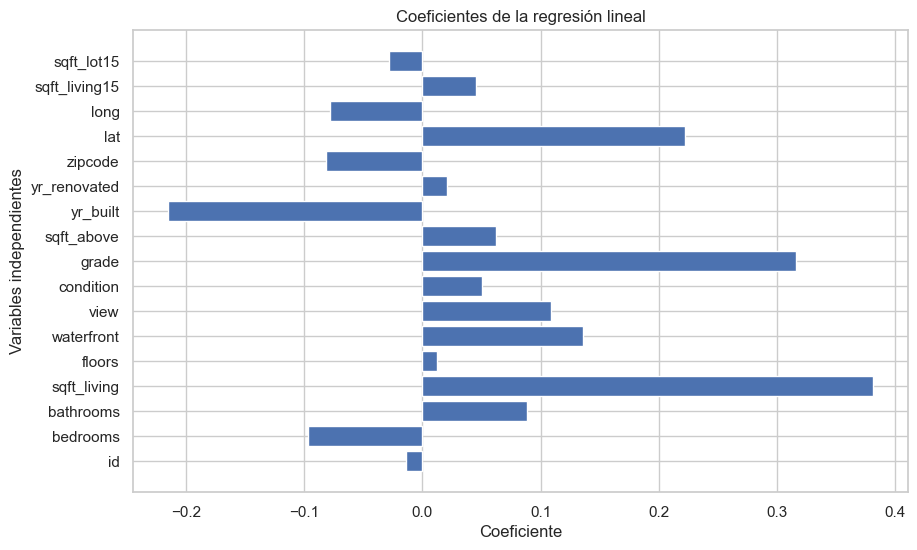

In [93]:
coef = modelo.coef_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, coef)
plt.xlabel('Coeficiente')
plt.ylabel('Variables independientes')
plt.title('Coeficientes de la regresión lineal')
plt.show()

De la representacion anterior:
- Los barras hacia la izda/dcha representan si la relacion con el precio es negativa/positiva (es decir si a medida que crece la carateritica en cuestion, decrece/crece el precio).
- La magnitid o el tmaño de la barra muestran si la incidencia en el precio es mayor/menor
- Estas variables se anañizan aqui ceteris paribus, suponiendo que el resto se mantienen constantes

In [109]:
importances = modelo.coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

          feature  importance
3     sqft_living    0.381059
8           grade    0.315858
13            lat    0.222012
5      waterfront    0.136037
6            view    0.108631
2       bathrooms    0.088231
9      sqft_above    0.062208
7       condition    0.050346
15  sqft_living15    0.044999
11   yr_renovated    0.021073
4          floors    0.012293
0              id   -0.013748
16     sqft_lot15   -0.027910
14           long   -0.078311
12        zipcode   -0.081924
1        bedrooms   -0.096954
10       yr_built   -0.215186


In [94]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.30
Mean Absolute Error (MAE): 0.34
R² Score: 0.69


La anteriores mediciones son metricas de evalucaion y nos sirven para analizar la calidad del modelo para poder realizar una predicción:
    - El MSE de 0.30 indica que, en promedio, las predicciones del modelo están desviadas en 0.30 unidades cuadradas de la variable dependiente
    - MAE del 0.34 indica que, en promedio, las predicciones del modelo están desviadas en 0.34 unidades de la variable dependiente
    - En tu caso, el R² Score de 0.69 indica que el modelo explica aproximadamente el 69% de la variabilidad de los datos observados

Cuanto menor MSE y MAE y mayor R² Score mejor ajuste del modelo a los datos y mejores predicciones.

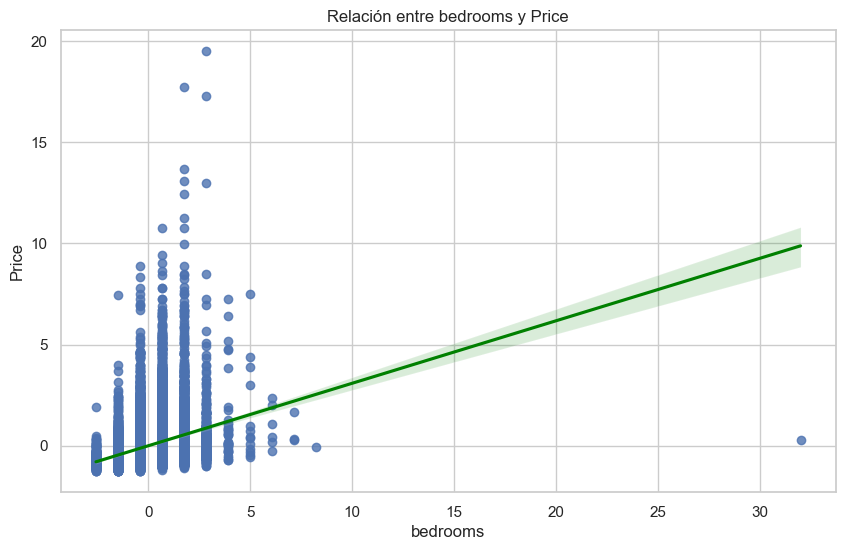

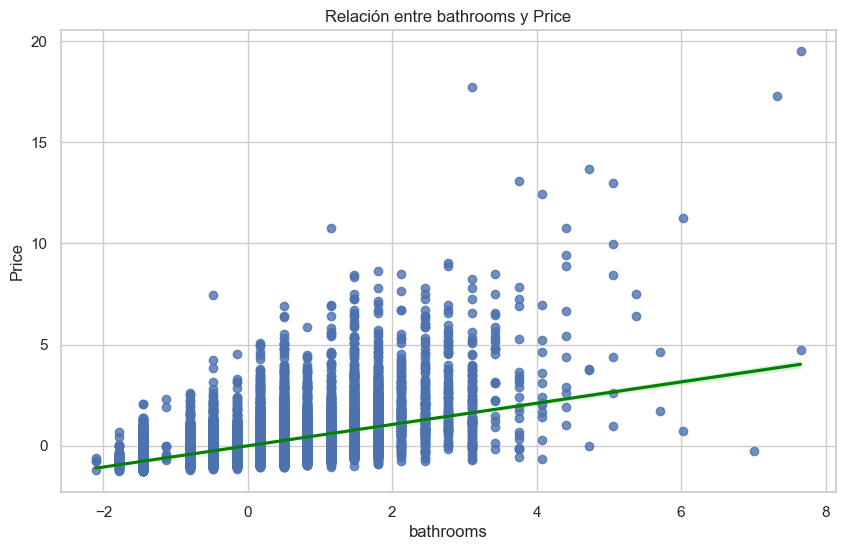

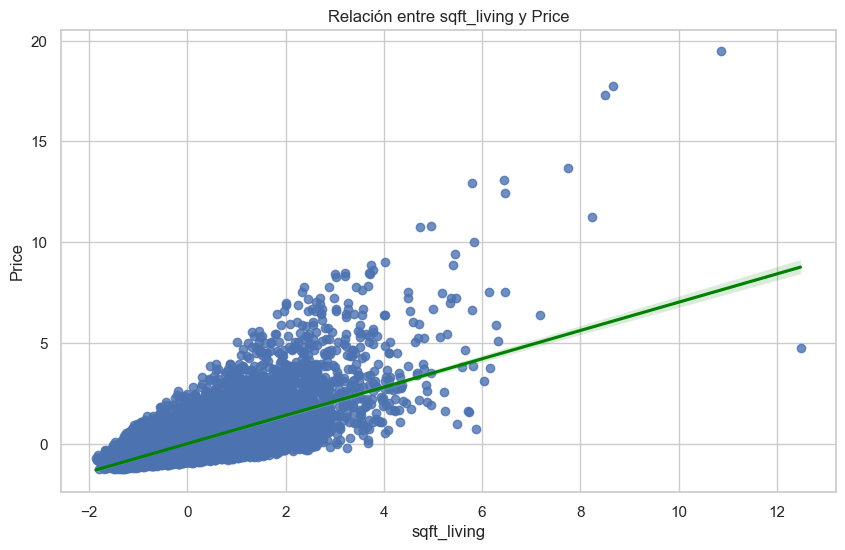

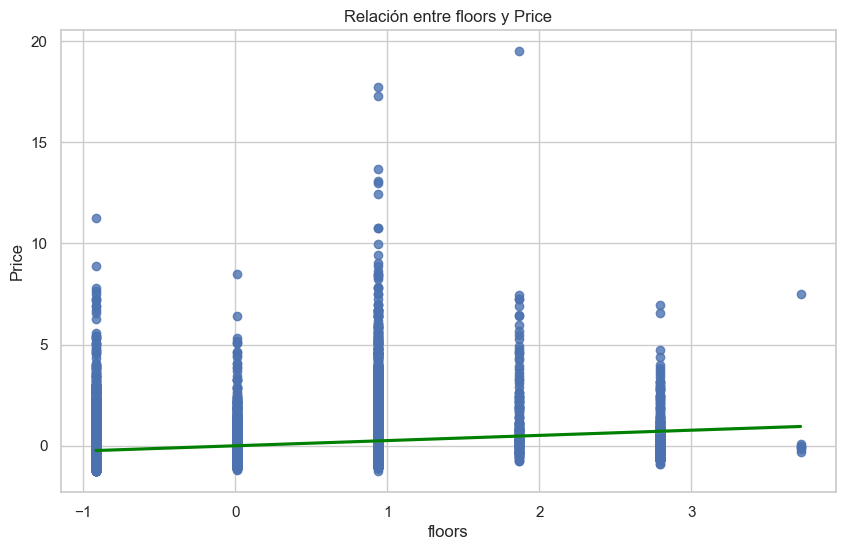

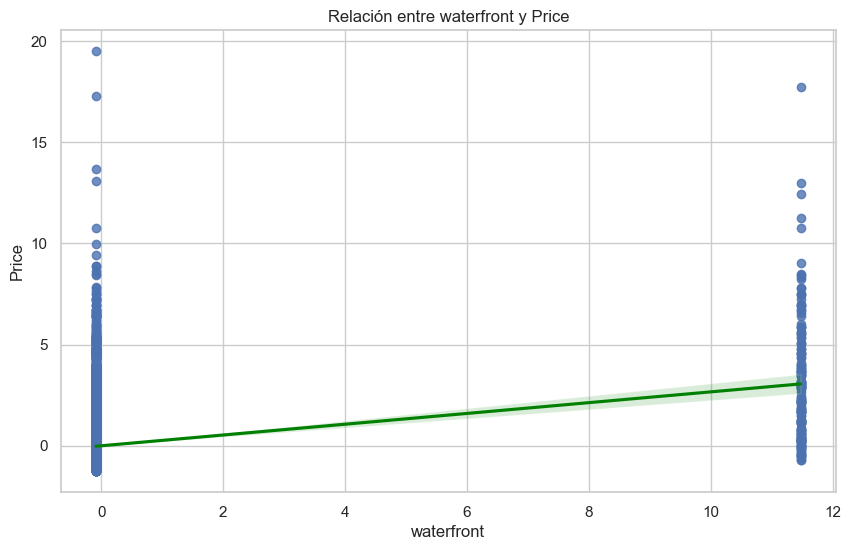

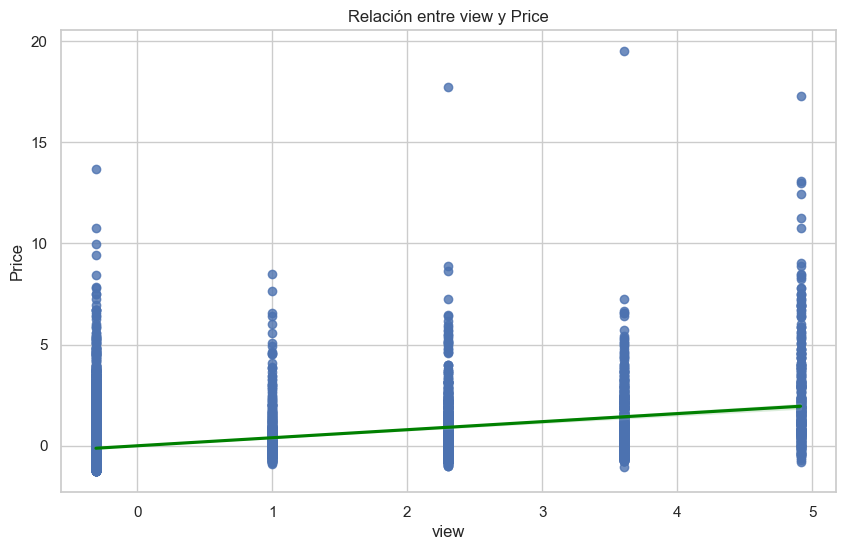

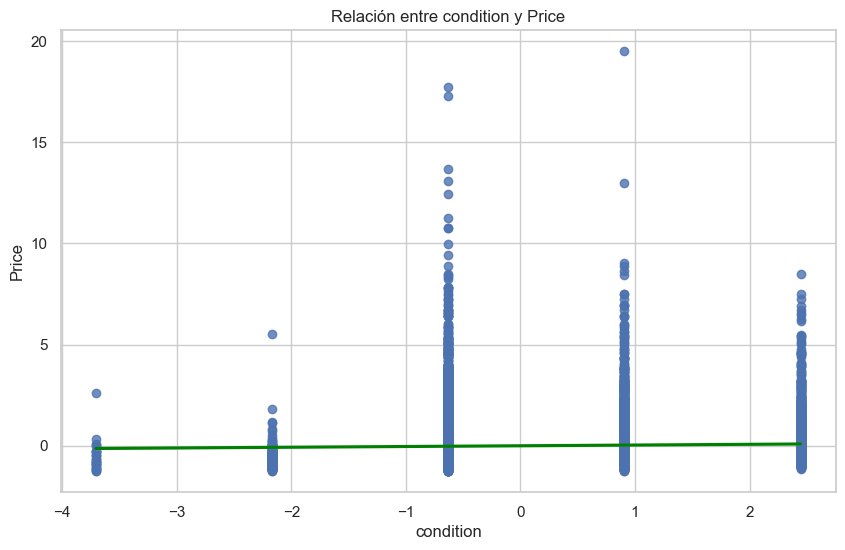

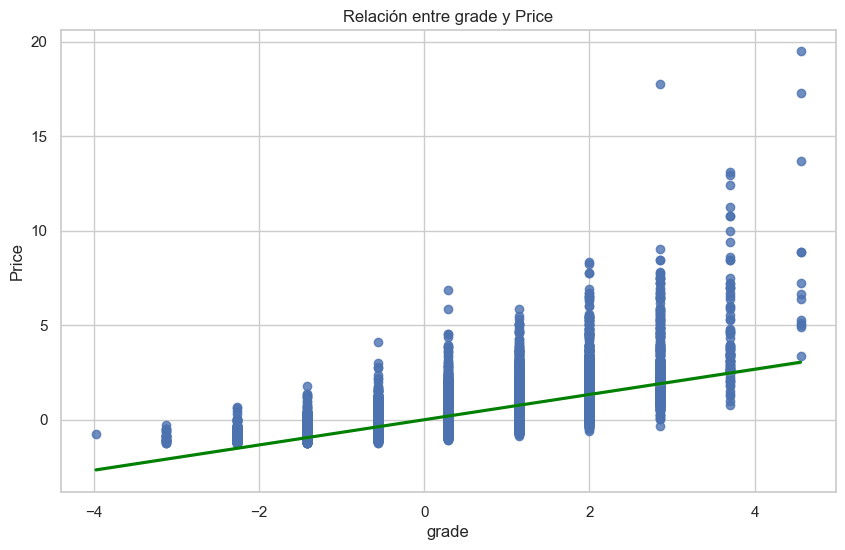

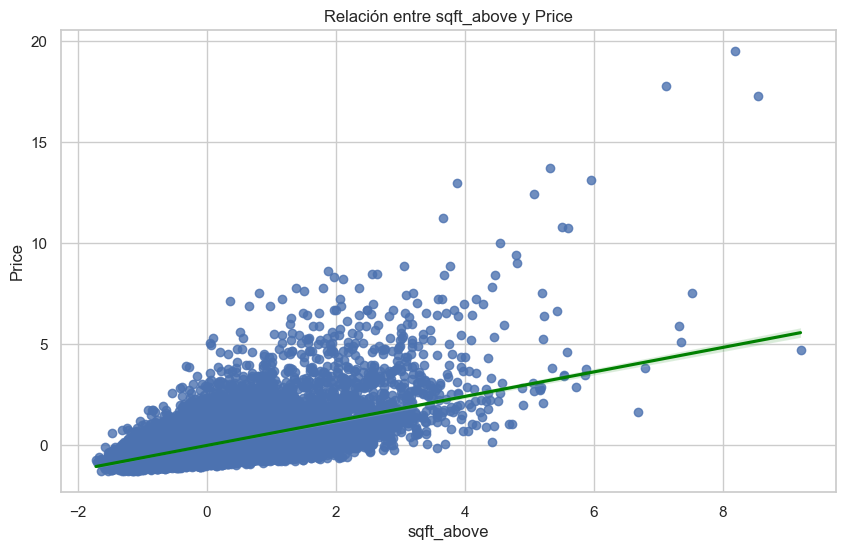

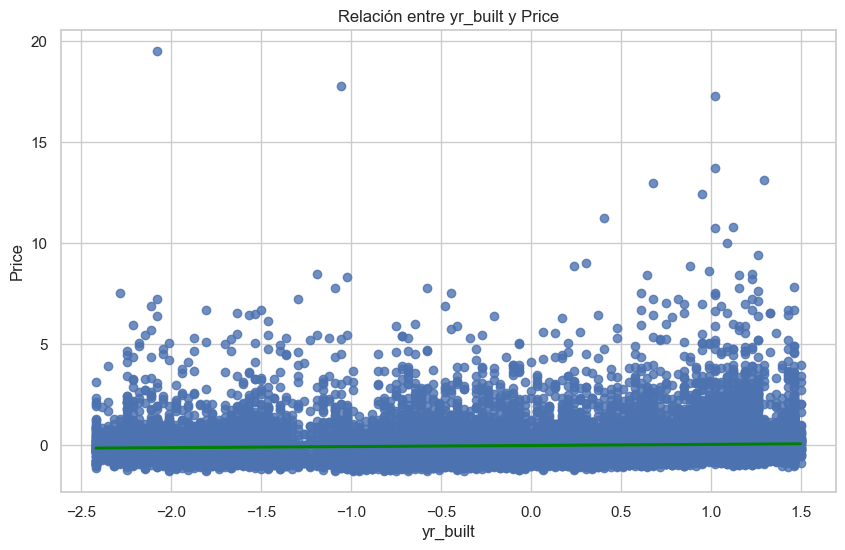

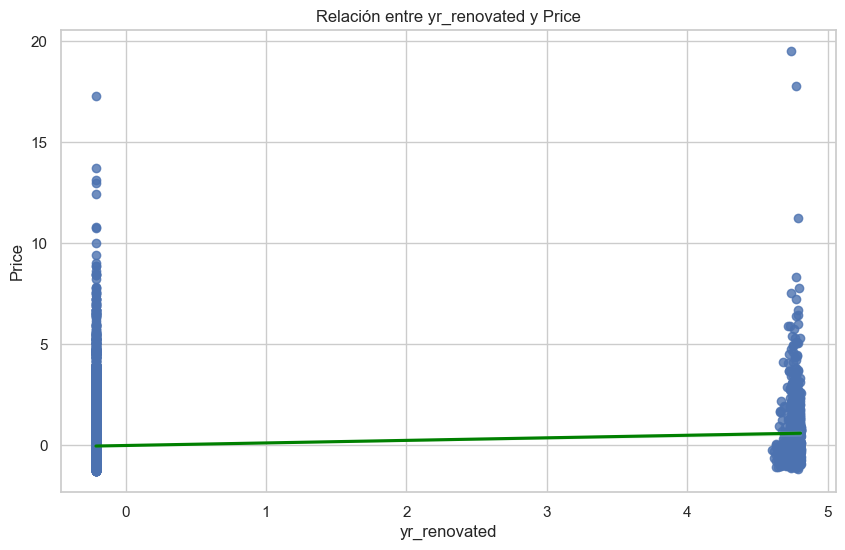

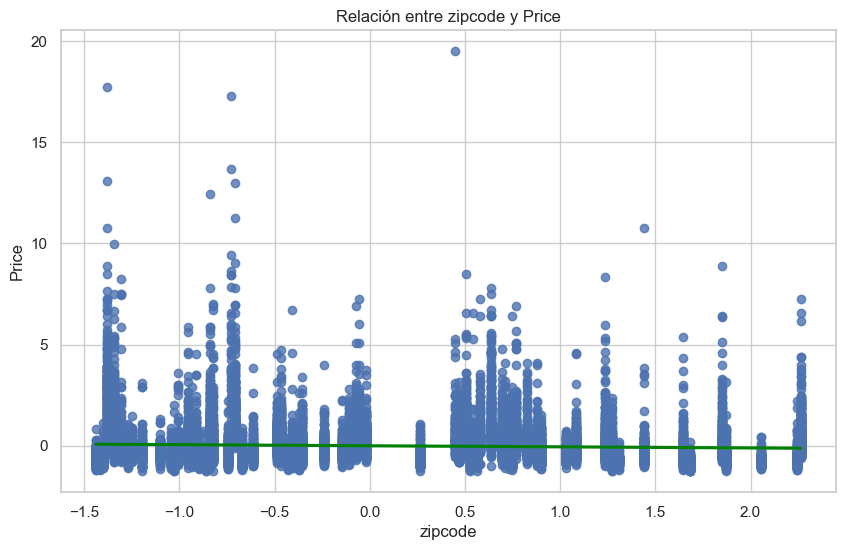

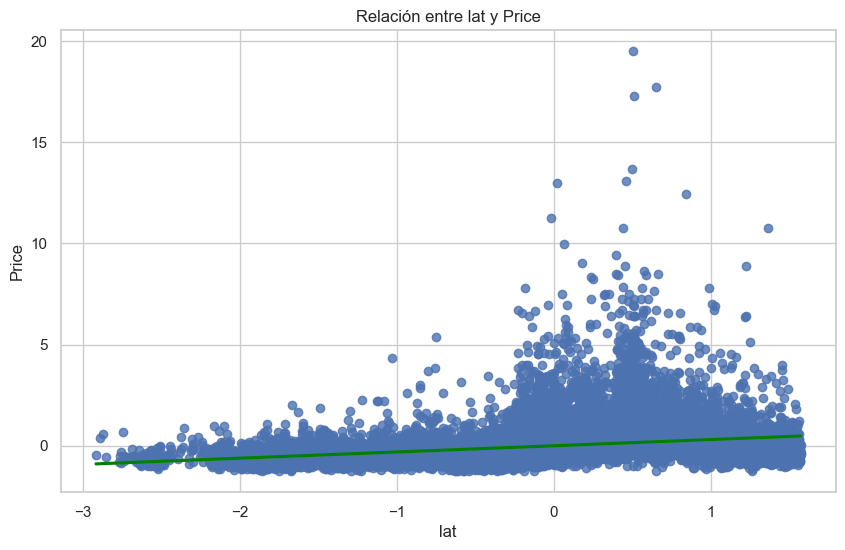

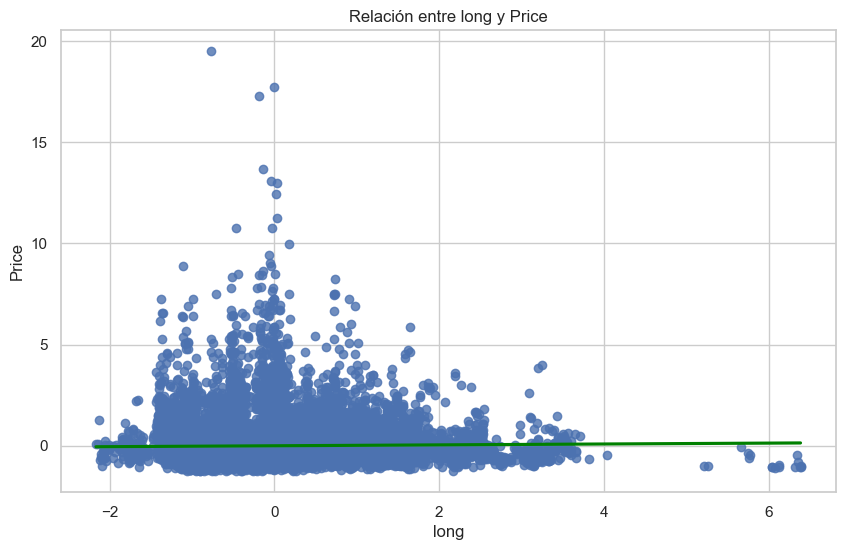

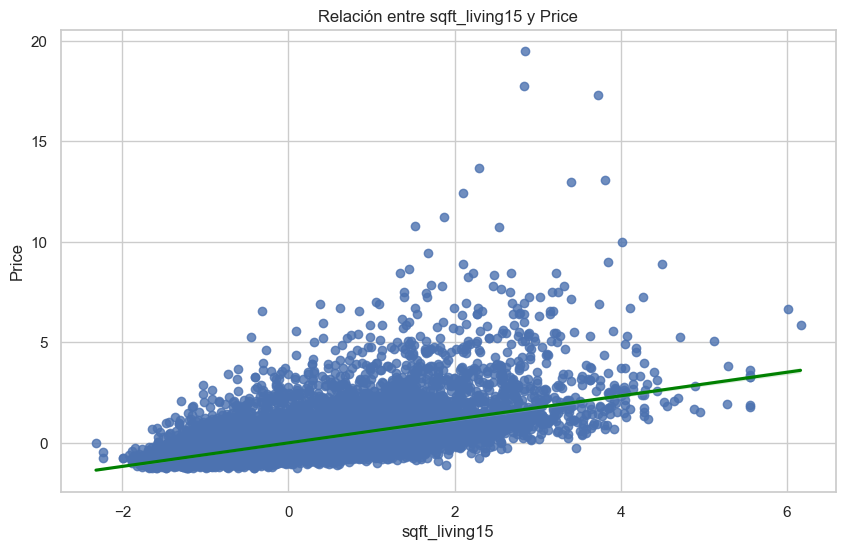

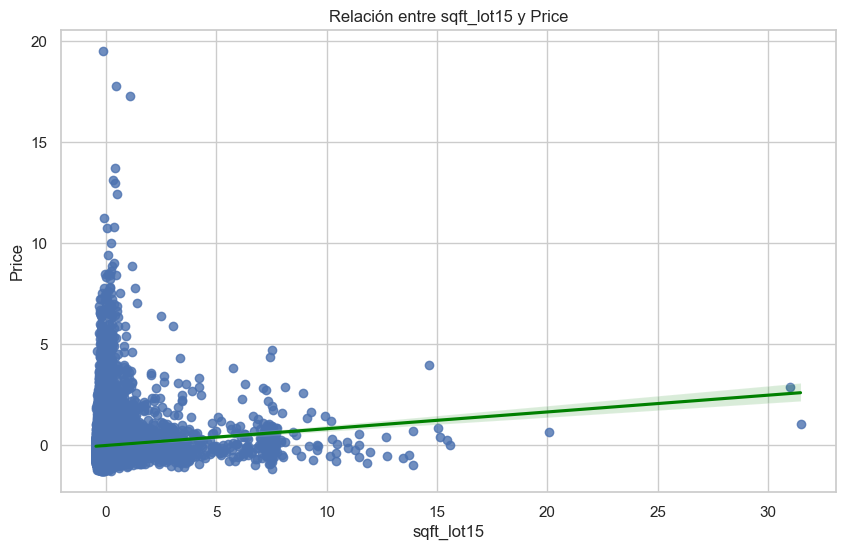

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas a excluir
exclude_columns = ['id']

# Filtrar las columnas de X para excluir las especificadas
filtered_columns = [col for col in X.columns if col not in exclude_columns]

# Crear un gráfico de dispersión con línea de tendencia para cada variable independiente, excluyendo las columnas especificadas
for column in filtered_columns:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X[column], y=y, scatter=True, line_kws={"color": "green"})
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Relación entre {column} y Price')
    plt.show()

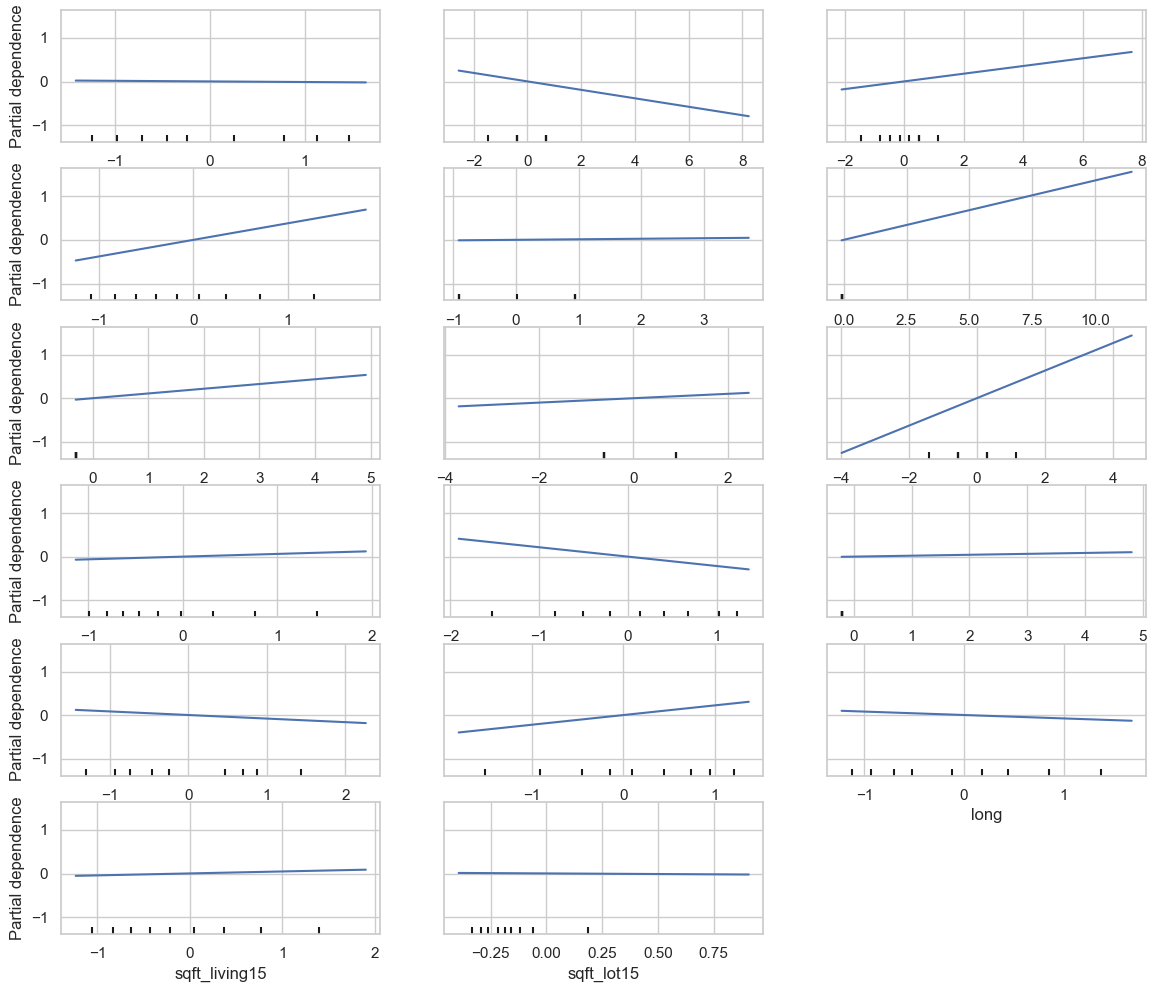

In [96]:
# Crear gráficos de dispersión parcial para todas las variables independientes
fig, ax = plt.subplots(figsize=(14, 12))
PartialDependenceDisplay.from_estimator(modelo, X_train, features=X.columns, ax=ax)
plt.show()

Las representaciones anteriores muestran una visión clara de la relación entre una característica y la variable objetivo, teniendo en cuenta el efecto de otras características. Muestra los cambios esperados en la variable objetivo cuando se cambia el valor de la característica, manteniendo todas las demás características constantes.

La curva en los gráficos muestra la relación entre la característica seleccionada y la variable objetivo. En los casos ascendentes indica que a medida que el valor de la característica aumenta, la variable objetivo (precio) también tiende a aumentar. Si la línea es descendente, indica que segun crece el valor de la característica, la variable objetivo tiende a disminuir. Una línea horizontal sugiere que la característica tiene poco o ningún efecto en la variable objetivo--> Escasa/nula relacion entre las variables-

LA pendite (mayor/menor) indica el mayor/menor impacto de esa carateritica en el precio.

Siem embargo, este tipo de representación muestra un efecto promedio de cada característica, asumiendo que todas las demás características se mantienen constantes. Hemos de considerarlo por ello, una simplificación útil, pero no completa ni precisa de las interacciones complejas que existen eentre las diferentes variables independitnes.

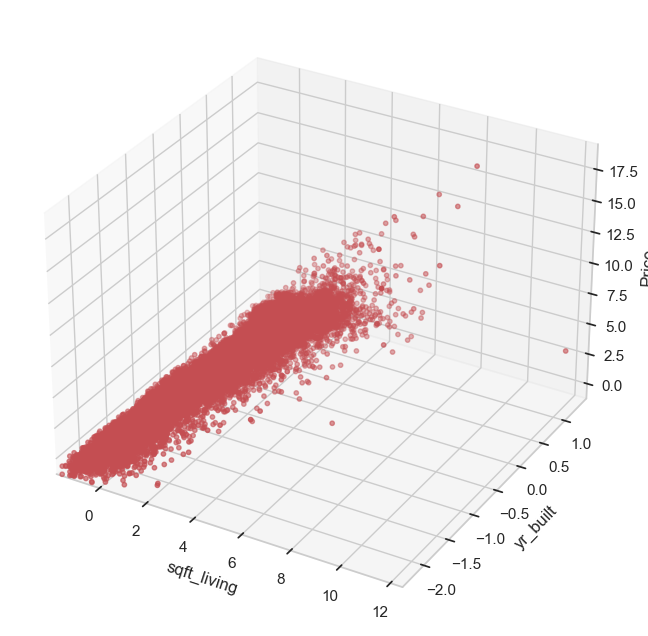

In [97]:
# Supongamos que elegimos 'feature1' y 'feature2' para la visualización
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['sqft_living'], X['yr_built'], y, c='r', marker='o', s=10)
ax.set_xlabel('sqft_living')
ax.set_ylabel('yr_built')
ax.set_zlabel('Price')

# Ajustar los límites de los ejes para que se adapten mejor a los datos
ax.set_xlim([X['sqft_living'].min(), X['sqft_living'].max()])
ax.set_ylim([X['yr_built'].min(), X['yr_built'].max()])
ax.set_zlim([y.min(), y.max()])

plt.show()

# METODOS COMPLEMENTARIOS:

## - KNN:

In [98]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Especifica el número de vecinos (K)
knn_model.fit(X_train_knn, y_train_knn)  # Entrena el modelo con el conjunto de entrenamiento

# Predicciones con KNN
knn_predictions = knn_model.predict(X_test_knn)

# Evaluación del rendimiento del modelo KNN
knn_mse = mean_squared_error(y_test_knn, knn_predictions)
knn_mae = mean_absolute_error(y_test_knn, knn_predictions)
knn_r2 = r2_score(y_test_knn, knn_predictions)

print("KNN Mean Squared Error (MSE): {:.2f}".format(knn_mse))
print("KNN Mean Absolute Error (MAE): {:.2f}".format(knn_mae))
print("KNN R² Score: {:.2f}".format(knn_r2))

KNN Mean Squared Error (MSE): 0.20
KNN Mean Absolute Error (MAE): 0.24
KNN R² Score: 0.79


In [115]:
# Calcular la importancia de las características mediante permutación
result = permutation_importance(knn_model, X, y, n_repeats=10, random_state=42)

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

          feature  importance
13            lat    0.139416
8           grade    0.125901
3     sqft_living    0.097803
15  sqft_living15    0.077132
9      sqft_above    0.068363
14           long    0.048872
5      waterfront    0.046164
2       bathrooms    0.044784
10       yr_built    0.034925
12        zipcode    0.030455
11   yr_renovated    0.026827
6            view    0.026492
7       condition    0.020485
1        bedrooms    0.013839
0              id    0.013580
4          floors    0.012319
16     sqft_lot15    0.011341


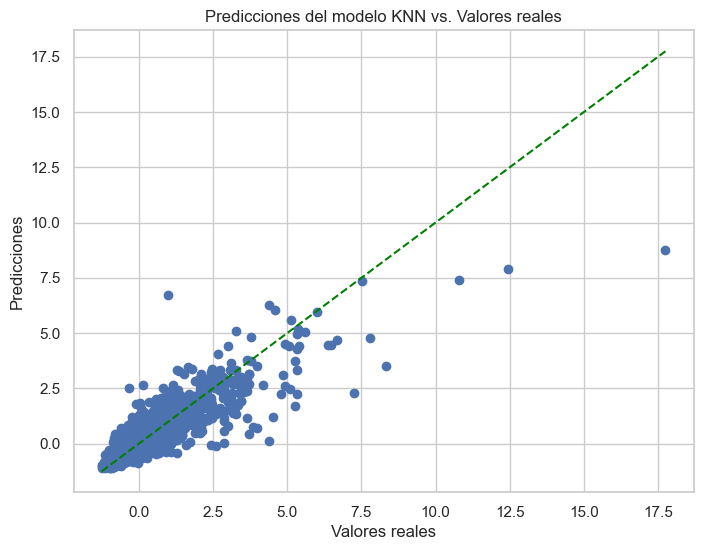

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_knn, knn_predictions)
plt.plot([min(y_test_knn), max(y_test_knn)], [min(y_test_knn), max(y_test_knn)], linestyle='--', color='green')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones del modelo KNN vs. Valores reales')
plt.show()

a línea diagonal punteada en rojo representa la línea donde las predicciones serían exactamente iguales a los valores reales. En un modelo perfecto, todas las predicciones estarían en esta línea indicando que las predicciones son muy cercanas a los valores reales, y que el rendimiento del modelo es perfecto. Por tanto, la dispersion mide  variabilidad de las predicciones en relación con los valores reales.

Ademas se analiza la dirección general/tendencia en la que se mueven los puntos. En este caso es negativa significa que las predicciones tienden a ser en su mayoría, menores que los valores reales.

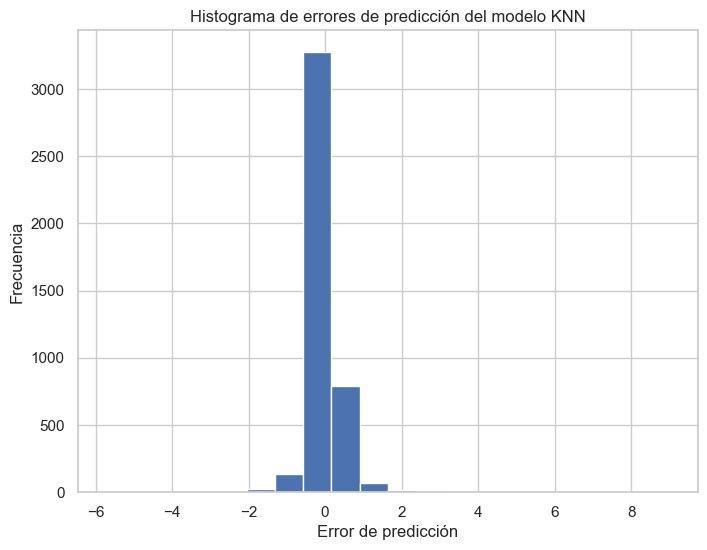

In [100]:
plt.figure(figsize=(8, 6))
plt.hist(y_test_knn - knn_predictions, bins=20)
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores de predicción del modelo KNN')
plt.show()

## - DECISION TREES:

In [121]:
# Crear el modelo de regresión con árboles de decisión
regressor = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
regressor.fit(X_train, y_train)

decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X, y)

DecisionTreeRegressor()

In [122]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test)

In [123]:
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.20048885666835423
R² Score: 0.7922180469671424


- un MSE de aproximadamente 0.2005 sugiere que, en promedio, los errores cuadrados de las predicciones del modelo son relativamente bajos.
- Un valor de 0.7922 indica que el modelo explica aproximadamente el 79.22% de la variabilidad en los datos. Este es un buen valor, lo que sugiere que el modelo tiene un buen poder predictivo, aunque no perfecto.
De lo anterior podemos concluir que 

In [124]:
# Calcular la importancia de las características mediante permutación
result = permutation_importance(decision_tree_model, X, y, n_repeats=10, random_state=42)

# Crear un DataFrame para mostrar la importancia de las características
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

          feature  importance
13            lat    0.605819
3     sqft_living    0.442009
14           long    0.417152
8           grade    0.367334
15  sqft_living15    0.102530
10       yr_built    0.091292
16     sqft_lot15    0.090326
9      sqft_above    0.078417
5      waterfront    0.056276
12        zipcode    0.055429
0              id    0.050273
6            view    0.020908
2       bathrooms    0.018607
1        bedrooms    0.017339
7       condition    0.011305
4          floors    0.009657
11   yr_renovated    0.006360


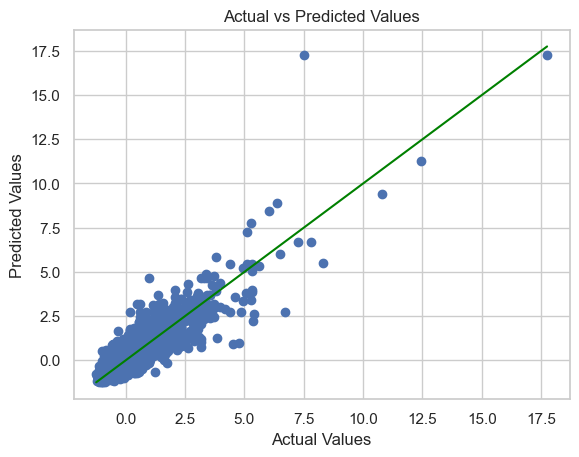

In [104]:
# Crear un gráfico de dispersión de las predicciones frente a los valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')
plt.show()



El modelo de regresión con árboles de decisión predice con alta precisión, con la mayoría de las predicciones cercanas a los valores reales. Esto sugiere que el modelo es adecuado para este conjunto de datos. 

Esta observaión gráfica es consisitente con una varianza (R²) de caso 0,8

In [105]:
df_concat.to_csv('df_real_estate.csv', index=False)

In [106]:
import os
print(os.getcwd())


c:\Users\anasa\Desktop\Ana\IRONHACK\Mini-proyecto\Real Estate\Python
